In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# One of the things we love about pandas is that it's easy to load CSV data
# into a "data frame" which is the 
path_to_ny_sales = '../datasets/nyc-property/nyc-rolling-sales.csv'
sales_df = pd.read_csv(path_to_ny_sales)

columns_to_convert = [
    'LAND SQUARE FEET',
    'GROSS SQUARE FEET',
    'SALE PRICE',
    'YEAR BUILT'
]

for column_name in columns_to_convert:
    sales_df[column_name] = pd.to_numeric(sales_df[column_name], errors='coerce')
    sales_df = sales_df[sales_df[column_name].notna()]
    
sales_df.describe()

,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,48244.000000,48244.000000,48244.000000,48244.000000,48244.000000,48244.000000,48244.000000,48244.000000,4.824400e+04,4.824400e+04,48244.000000,48244.000000,4.824400e+04
mean,10448.940511,3.251741,4984.532191,234.324662,10939.681328,2.566537,0.249171,2.834632,3.358117e+03,3.669753e+03,1827.765173,1.475769,1.153281e+06
std,7574.416359,0.903136,3427.418090,496.361521,1072.752086,17.465481,10.988072,20.750418,3.143590e+04,2.947491e+04,464.361153,0.833589,1.340131e+07
min,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,0.000000e+00
25%,3919.750000,3.000000,2206.750000,21.000000,10469.000000,1.000000,0.000000,1.000000,1.413000e+03,8.280000e+02,1920.000000,1.000000,8.042000e+04
50%,8084.000000,3.000000,4660.500000,45.000000,11217.000000,1.000000,0.000000,1.000000,2.140000e+03,1.620000e+03,1931.000000,1.000000,4.800000e+05
75%,17160.000000,4.000000,6996.000000,94.000000,11237.000000,2.000000,0.000000,2.000000,3.071000e+03,2.520000e+03,1961.000000,2.000000,8.300000e+05
max,26702.000000,5.000000,16319.000000,9009.000000,11694.000000,1844.000000,2261.000000,2261.000000,4.228300e+06,3.750565e+06,2017.000000,4.000000,2.210000e+09


In [6]:
sales_df['SALE PRICE'].max()
sales_df[ sales_df['SALE PRICE'] == sales_df['SALE PRICE'].max() ]


,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
7447,7451,1,MIDTOWN CBD,21 OFFICE BUILDINGS,4,1301,1,,O4,245 PARK AVENUE,...,0,35,35,81336.0,1586886.0,1966,4,O4,2.210000e+09,2017-05-05 00:00:00


In [3]:
less_than_ten = sales_df[ sales_df['SALE PRICE'] < 10 ]
less_than_ten.shape[0]


10337

In [4]:
before_fifty = sales_df[ sales_df['YEAR BUILT'] < 1950 ]
before_fifty.shape[0]


30232

In [5]:
most_expensive = sales_df[ sales_df['GROSS SQUARE FEET'] == sales_df['GROSS SQUARE FEET'].max() ]
most_expensive.head(5)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
61460,12062,4,GLEN OAKS,10 COOPS - ELEVATOR APARTMENTS,2,8489,1,,D4,26910 GRAND CENTRAL PARKWA,...,1844,22,1866,4228300.0,3750565.0,1972,2,D4,525000.0,2017-07-05 00:00:00


In [7]:
sales_df[ sales_df['GROSS SQUARE FEET'] == sales_df['GROSS SQUARE FEET'].min() ]

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
18354,52,2,BATHGATE,10 COOPS - ELEVATOR APARTMENTS,2,3035,48,,D4,"463 EAST 178TH STREET, 6E",...,0,0,0,0.0,0.0,1935,2,D4,40000.0,2017-04-17 00:00:00
18355,53,2,BATHGATE,10 COOPS - ELEVATOR APARTMENTS,2,3035,48,,D4,"463 EAST 178TH ST, 6B",...,0,0,0,0.0,0.0,1935,2,D4,40000.0,2017-04-17 00:00:00
18356,54,2,BATHGATE,10 COOPS - ELEVATOR APARTMENTS,2,3044,40,,D4,"495 E 178TH STREET, 2H",...,0,0,0,0.0,0.0,1941,2,D4,60000.0,2016-12-01 00:00:00
18364,62,2,BATHGATE,29 COMMERCIAL GARAGES,4,2918,29,,G7,1885 BATHGATE AVENUE,...,0,0,0,3070.0,0.0,0,4,G7,2500000.0,2016-12-15 00:00:00
18371,69,2,BATHGATE,31 COMMERCIAL VACANT LAND,4,3028,13,,V9,1996 WEBSTER AVENUE,...,0,0,0,5945.0,0.0,0,4,V9,1200000.0,2016-10-19 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49397,24046,3,WYCKOFF HEIGHTS,41 TAX CLASS 4 - OTHER,4,3189,1,,Z9,35 WYCKOFF AVENUE,...,0,0,0,2431.0,0.0,0,4,Z9,5650000.0,2017-05-04 00:00:00
49398,24047,3,WYCKOFF HEIGHTS,41 TAX CLASS 4 - OTHER,4,3189,2,,Z9,33 WYCKOFF AVENUE,...,0,0,0,2415.0,0.0,0,4,Z9,0.0,2017-05-04 00:00:00
49399,24048,3,WYCKOFF HEIGHTS,41 TAX CLASS 4 - OTHER,4,3189,3,,Z9,33A WYCKOFF AVENUE,...,0,0,0,2390.0,0.0,0,4,Z9,0.0,2017-05-04 00:00:00
49400,24049,3,WYCKOFF HEIGHTS,41 TAX CLASS 4 - OTHER,4,3280,50,,Z9,383 HARMAN STREET,...,0,0,0,2765.0,0.0,0,4,Z9,2825000.0,2017-03-28 00:00:00


In [8]:
most_sold_zip = sales_df.groupby ("ZIP CODE").count()
#most_sold_zip = sales_df [ most_sold_zip.head(0)]
most_sold_zip.head(200)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
ZIP CODE,,,,,,,,,,,,,,,,,,,,,
0,391,391,391,391,391,391,391,391,391,391,...,391,391,391,391,391,391,391,391,391,391
10001,23,23,23,23,23,23,23,23,23,23,...,23,23,23,23,23,23,23,23,23,23
10002,29,29,29,29,29,29,29,29,29,29,...,29,29,29,29,29,29,29,29,29,29
10003,34,34,34,34,34,34,34,34,34,34,...,34,34,34,34,34,34,34,34,34,34
10004,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11436,242,242,242,242,242,242,242,242,242,242,...,242,242,242,242,242,242,242,242,242,242
11691,258,258,258,258,258,258,258,258,258,258,...,258,258,258,258,258,258,258,258,258,258
11692,110,110,110,110,110,110,110,110,110,110,...,110,110,110,110,110,110,110,110,110,110


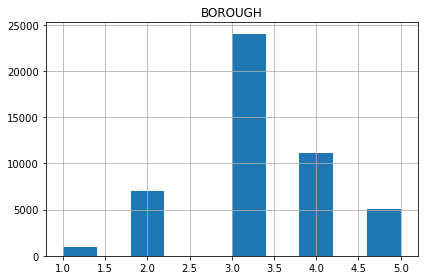

In [2]:
 sales_df.hist(column=["BOROUGH"])

# Matplotlib's tight_layout function makes the charts a bit cleaner.
plt.tight_layout()
plt.show()

In [2]:
plot =  sales_df.plot.pie(y='BOROUGH', figsize=(5, 5))

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f81c53a79d0> (for post_execute):


KeyboardInterrupt: 